# <h1 align="center">Empirical Methods Vector Auto-Regressive Practice</h1> 



### Var Implementation 

### Use the data on quarterly excess stock market returns, the market Dividend / Price ratio,and the difference between the 10-yr Treasury yield and the Fed Funds  rate in the excel spreadsheet "MktRet_DP_TermSpread.xlsx". The interest rate data is from the FRED data depository, available online from the St. Louis Fed.

### 1. Plot each series. Give the sample mean, standard deviation, and first order autocorrelation of each series. From the first-order autocorrelation, calculate the half-life of each series (see ARMA notes for exact half-life formula).


### Recall: we can rewrite the AR(1) process as:

### $$ r_{t+h} - \mu = \phi^{h}(r_{t} - \mu) + \phi^{h-1}\epsilon_{t+1} + ... + \epsilon_{t+h}$$

### Suppose $ 0 < \phi_{1} < 1$

###         - at the **Half Life**, the process is expected to cover 1/2 of the distance to the mean:

### $$\mathbb{E_{t}}[r_{t+h} - \mu] = \phi^{h}_{1}(r_{t} - \mu) = .5(r_{t} - \mu)$$

### the half-life is defined by setting $\phi^{h}_{1} = 0.5$ and solving

## $$h = \frac{\log(0.5)}{\log{(\phi_{1})}}$$

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Fri Feb  4 10:52:31 2022

@Blacksheep, CFA
"""


# Importing libraries
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import scipy.stats as ss
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats, linalg
import yfinance as yf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from time import time
from datetime import timedelta
from statsmodels.tsa.stattools import ccovf
from statsmodels.regression.linear_model import RegressionResults
from statsmodels.tsa.vector_ar.vecm import coint_johansen


MktRet = r"C:\Users\user\Downloads\MktRet_DP_TermSpread.xlsx"

df = pd.read_excel(MktRet, parse_dates= ['Date'])
df = df.set_index(df['Date'])
df.columns
df = df.set_index('Date')





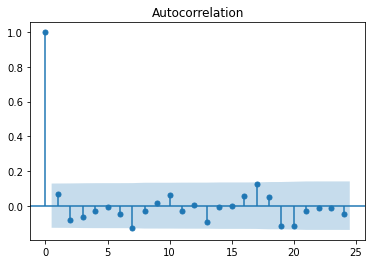

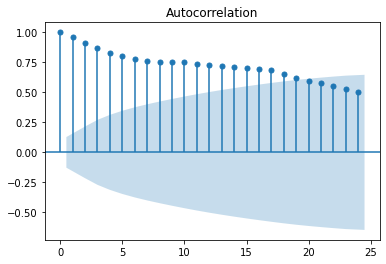

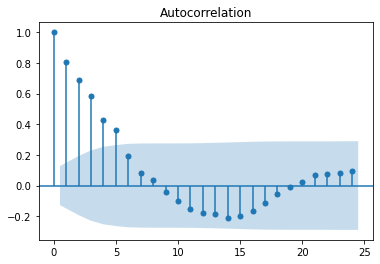

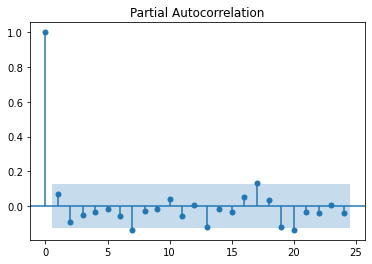

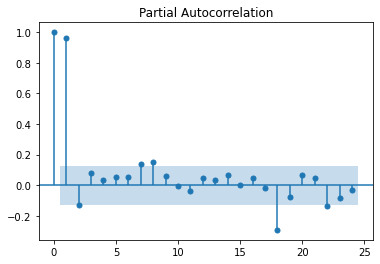

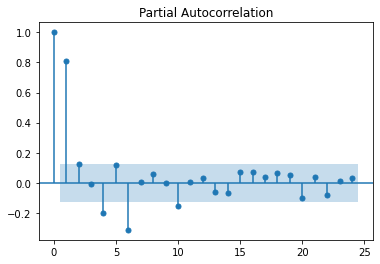

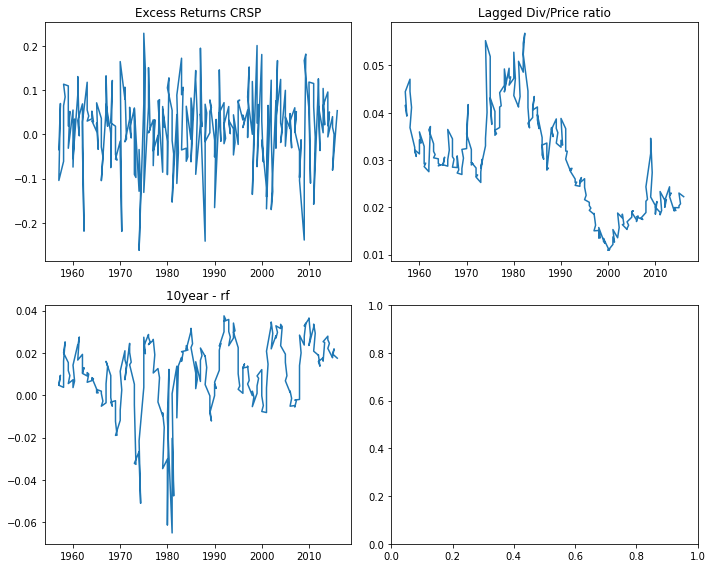

In [3]:

return_mean = df["MktExRet"].mean()
return_volatility = df["MktExRet"].std()
return_phi1 = sm.tsa.acf(df['MktExRet'], nlags=1, fft=False)[1]

avg_div_yield = df['Mkt_DP'].mean()
div_yield_vol = df['Mkt_DP'].std()
div_yield_phi1 = sm.tsa.acf(df['Mkt_DP'], nlags=1, fft=False)[1]

FF_mean = df['y10minFedFunds'].mean()
FF_vol = df['y10minFedFunds'].std()
FF_phi1 = sm.tsa.acf(df['y10minFedFunds'],nlags=1, fft=False)[1]

plot_acf(df['MktExRet'])
plot_acf(df['Mkt_DP'])
plot_acf(df['y10minFedFunds'])


plot_pacf(df['MktExRet'])
plot_pacf(df['Mkt_DP'])
#here we see some partial autocorrelation
plot_pacf(df['y10minFedFunds'])


fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.plot(df['MktExRet'])
ax1.set_title('Excess Returns CRSP')
ax2.plot(df['Mkt_DP'])
ax2.set_title("Lagged Div/Price ratio")
ax3.plot(df['y10minFedFunds'])
ax3.set_title("10year - rf")
# ax4.plot(df['return_volatility'])
# ax4.set_title("Return Volatility")
plt.tight_layout()
plt.show()


return_half = np.log(0.5)/np.log(return_phi1)
div_half = np.log(0.5)/np.log(div_yield_phi1)
FF_half = np.log(0.5)/np.log(FF_phi1)




In [4]:

print("lag 1 autocorrelation")
print("mkt excess return, ", return_phi1)
print("mkt DP, ", div_yield_phi1)
print("yield minus fed fund, ", FF_phi1)

result = {"index title":['mean', 'standard deviation', 'auto correlation','half life formula'],\
 'MktExRet': [return_mean, return_volatility,\
 return_phi1,np.log(0.5)/np.log(return_phi1)],\
 'Mkt_DP':[avg_div_yield, div_yield_vol,\
 div_yield_phi1,np.log(0.5)/np.log(div_yield_phi1)],\
 'y10minFedFunds': [FF_mean, FF_vol, FF_phi1,np.log(0.5)/np.log(FF_phi1)]}


result_df = pd.DataFrame(result).set_index('index title')
print(result_df)

lag 1 autocorrelation
mkt excess return,  0.06960753875735402
mkt DP,  0.9580781486266736
yield minus fed fund,  0.8034492244558206
                    MktExRet     Mkt_DP  y10minFedFunds
index title                                            
mean                0.016055   0.029365        0.010628
standard deviation  0.084350   0.010339        0.017023
auto correlation    0.069608   0.958078        0.803449
half life formula   0.260104  16.185222        3.167351


### 2. Estimate a VAR(1). Give the coeficient estimates, their White standard errors, and the R2from each regression.

In [5]:
#plot Var(1)
model = VAR(df)
model_fit = model.fit(maxlags = 1)
print(model_fit.summary())

print(f"Coefficients: {model_fit.params}\n.")
print(f" Standard errors:\n{model_fit.bse}\n")




  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 22, Feb, 2022
Time:                     18:19:10
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.4928
Nobs:                     235.000    HQIC:                  -27.5982
Log likelihood:           2262.80    FPE:                9.62344e-13
AIC:                     -27.6694    Det(Omega_mle):     9.14830e-13
--------------------------------------------------------------------
Results for equation MktExRet
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                    -0.038275         0.018048           -2.121           0.034
L1.MktExRet               0.048519         0.065539            0.740           0.459
L1.Mkt_DP                 1.450922       

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


In [6]:
#Lets get white standard errors and the R^squared for each vector of the VAR

X = sm.add_constant(df)
model_mkt = sm.OLS(X['MktExRet'], X.shift(1), missing = 'drop').fit(cov_type='HC0')
model_div = sm.OLS(X['Mkt_DP'], X.shift(1), missing = 'drop').fit(cov_type = 'HC0')
model_FF = sm.OLS(X['y10minFedFunds'], X.shift(1), missing = 'drop').fit(cov_type = 'HC0')

print(model_mkt.summary())
print(model_div.summary())
print(model_FF.summary())

                            OLS Regression Results                            
Dep. Variable:               MktExRet   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     4.127
Date:                Tue, 22 Feb 2022   Prob (F-statistic):            0.00709
Time:                        18:19:11   Log-Likelihood:                 255.19
No. Observations:                 235   AIC:                            -502.4
Df Residuals:                     231   BIC:                            -488.5
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0383      0.019     -1.

### 3. Is the VAR stationary?


## Recall:

## $ r_{t} = \mu + \sum^{\infty}_{j=0}\phi^{j}_{1}\epsilon_{t-j} ==> \phi^{j}_{1} --> 0$ as j $--> \infty $ to get stationary.


## The N eigenvalues $\lambda$ need to be less than 1 in Modulus:

## $$ |\lambda I_{n} - \phi_{1}| = 0$$

In [7]:
# There are a few ways we can do this. 
# lets check the eigenvalues the phi's. We also could use statmodels Augemented Dickey fuller test.  These both should yield the same result.
#eigenvalues of the phi's 
eigen_values,_ = np.linalg.eig(model_fit.coefs)
print(abs(eigen_values))

print("There are no eigenvalues such that their absolute values are greater than 1, Thus we can condlude stationarity.")

[[0.07441967 0.79530199 0.94071594]]
There are no eigenvalues such that their absolute values are greater than 1, Thus we can condlude stationarity.


### 4. What is the volatility of quarterly expected returns given the return forecasting regression?

### $$Var(y_{t+1}) ==> Var(aX + bY + cZ) = a^{2}\sigma^{2}_{X} + b^{2}\sigma^{2}_{Y} + c^{2}\sigma^{2}_{Z} + 2abCOV(X,Y) + 2acCOV(X,Z) + 2bcCOV(Y,Z) $$

In [8]:
phis = model_fit.coefs

phi11 = -0.04851
phi12 = 1.450922
phi13 = 1.049581
var_excess = (df['MktExRet'].shift(1).dropna().std())**2
var_mktdp = (df['Mkt_DP'].shift(1).dropna().std())**2
var_yield = (df['y10minFedFunds'].dropna().shift(1).std())**2

cov_excess_mktdp = np.cov(df['MktExRet'].shift(1).dropna(),df['Mkt_DP'].shift(1).dropna())[0,1]
cov_Mkt_DP_y10minFedFunds = np.cov(df['Mkt_DP'].shift(1).dropna(),df['y10minFedFunds'].shift(1).dropna())[0,1]
cov_excess_y10minFedFunds = np.cov(df['MktExRet'].shift(1).dropna(),df['y10minFedFunds'].shift(1).dropna())[0,1]

var = (phi11**2) * var_excess + (phi12**2) * var_mktdp + (phi13**2) * var_yield + \
2 * phi11 * phi12 * cov_excess_mktdp + 2 * phi12 * phi13 * cov_Mkt_DP_y10minFedFunds\
+ 2 * phi11 * phi13 * cov_excess_y10minFedFunds
print("volatility is , ", var**0.5)



volatility is ,  0.0200964289641219


## $$Forecasting$$

### Take the 1-step ahead conditional expectation:

### $$\mathbb{E_{t}}[r_{t+1}] = (I_{N} - \phi^{1}_{1})\mu + \phi^{1}_{1}r_{t}$$

### doing "h" steps ahead yields: $$\mathbb{E_{t}}[r_{t+1}] = (I_{N} - \phi^{1}_{1})\mu + \phi^{h}_{1}r_{t}$$
### $$\mathbb{E_{t}}[r_{t+1}] = (I_{N} - \phi^{1}_{1})(I_{n} - \phi_{1})^{-1}\phi_{0} + \phi^{h}_{1}r_{t}$$
### $$\mathbb{E_{t}}[r_{t+1}] = \phi_{0} + \phi^{h}_{1}r_{t}$$


### - Notice that if we take the limit as $h --> \infty$, we get $\lim_{(h->\infty)}\mathbb{E_{t}}[r_{t+h}] = \mu$

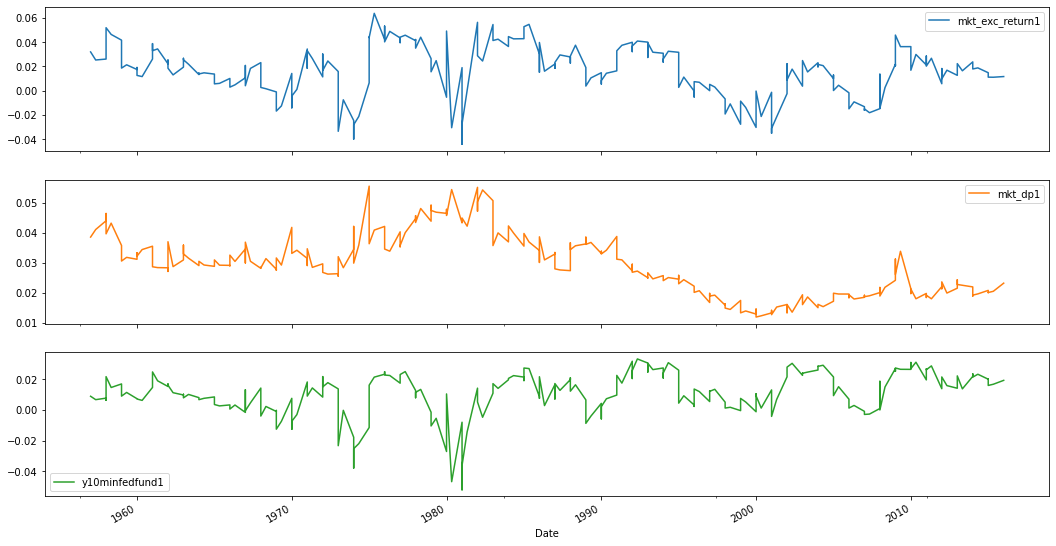

In [9]:
# one quarter ahead forecast
forecast_1 = (np.eye(3) - phis)@np.linalg.inv(np.eye(3)-phis)@model_fit.intercept +  np.transpose(np.linalg.matrix_power(model_fit.coefs,1)[0]@df.shift(1).dropna().T) 
forecast_1.columns = ['mkt_exc_return1','mkt_dp1','y10minfedfund1'] 
ax=forecast_1.plot(subplots=True, layout=(3,1),figsize=(18,10)) 




array([[<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>]], dtype=object)

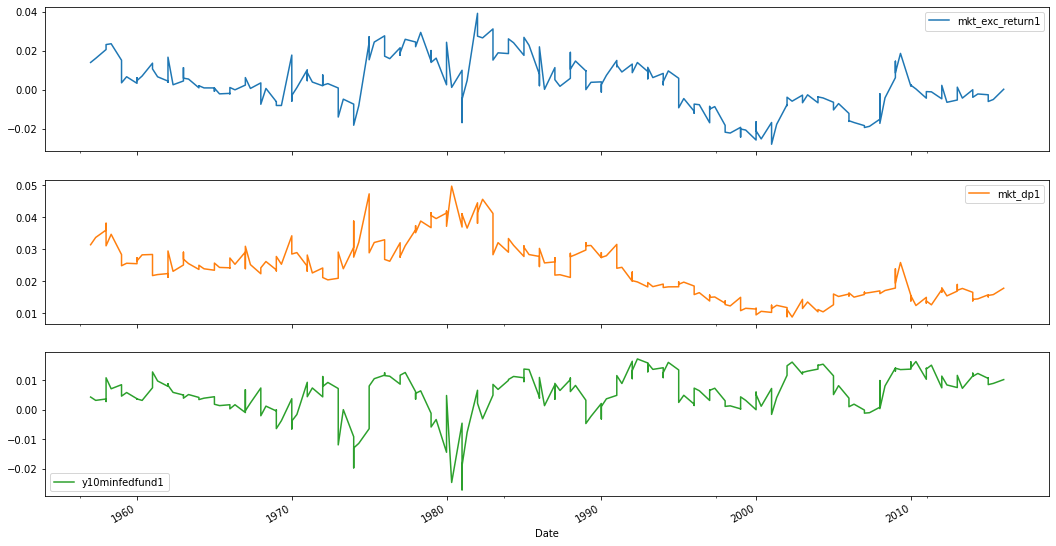

In [10]:
# four quarter ahead forecast
forecast_4 = np.transpose(np.linalg.matrix_power(phis,4)[0]@df.shift(1).dropna().T) + model_fit.intercept
forecast_4.columns = ['mkt_exc_return1','mkt_dp1','y10minfedfund1'] 

forecast_4.plot(subplots=True, layout=(3,1),figsize=(18,10))




array([[<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>]], dtype=object)

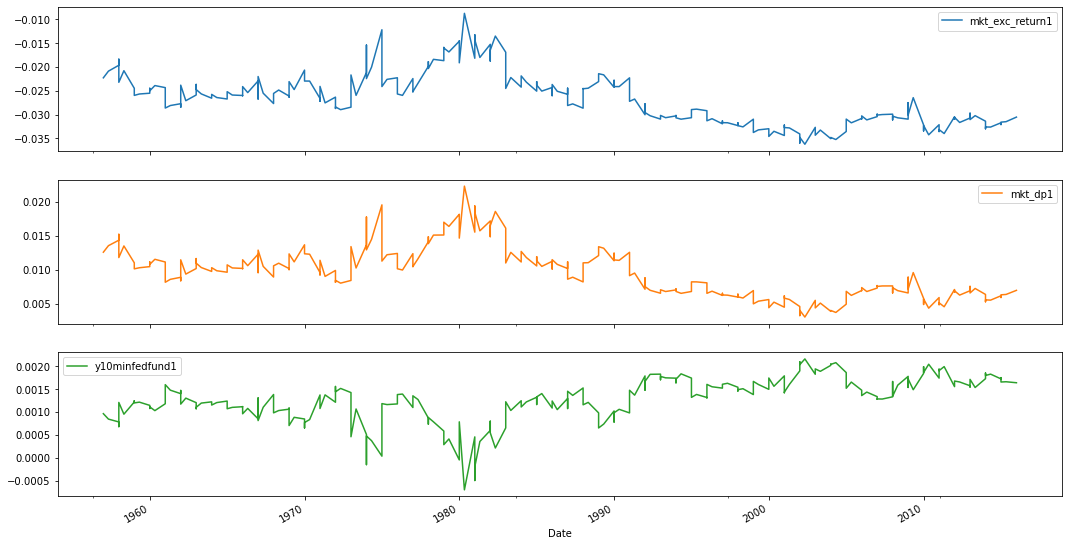

In [11]:
# twenty quarters ahead forecast
forecast_20 = np.transpose(np.linalg.matrix_power(phis,20)[0]@df.shift(1).dropna().T)+ model_fit.intercept
 
forecast_20.columns = ['mkt_exc_return1','mkt_dp1','y10minfedfund1'] 
forecast_20.plot(subplots=True, layout=(3,1), figsize=(18,10))


# print("The Longer Time Horizon appears to provide a clearer picture of the time series's long run average with less noise.")



### The Longer Time Horizon appears to provide a clearer picture of the time series's long run average with less noise.


### 6. Plot the impulse-response function for returns from a one standard deviation positive shock from each of the three shocks in turn using 20 lags. You can do this by simulation. 

1
Start at unconditional averages for the lagged values of all the variables in the VAR
(time t1). Then set the time $t_{shock}$ in row 1 of the VAR to its one standard deviation
value, and set all other current and future shocks to zero. Trace out the response by
simulating future variables using the VAR dynamics. That is the impulse-response for
the first shock. Then go to the second shock and repeat the procedure just outlined
for the first shock, but now set the second shock to its one standard deviation value
and all other shocks to zero, etc.

(it is best to plot the orthogonalized shock version of impulse-response (order the shocks
Term Spread, D/P. and Returns), but it is also fine if you do it the simple way. The
orthogonalized impulse-response math is given in the appendix)

## Recall
---
### Unconditional Average:

## $$\mu = (I_{n} - \phi_{1})^{-1}\phi_{0}$$


### Cholesky Decomposition yields a Lower Triangular matrix with the property that:

## $$ \Sigma^{C}\epsilon^{O}_{t+1} = \epsilon_{t+1}$$

### where $\epsilon_{t+1}$ is the 3x1 vector of Orthogonal shocks estimated in the OLS regressions with mean zero and variance - covariance matrix $\Sigma$.

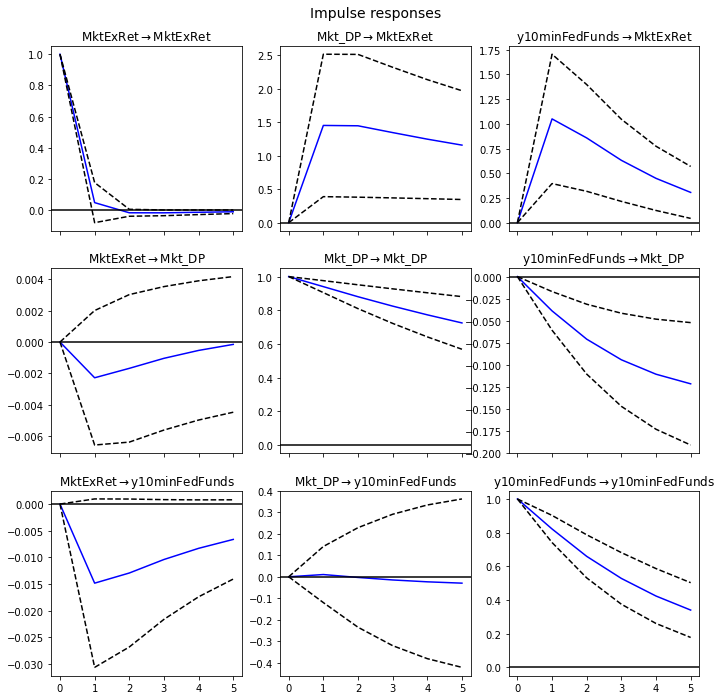

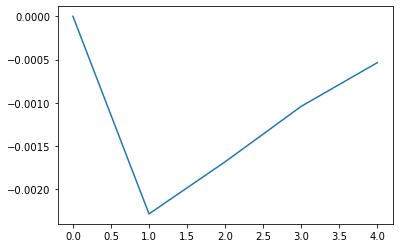

In [12]:
# start with 5 periods 
model_fit.irf(periods = 5).plot()
 
# We can do this mannually 

shock = np.array([1,0, 0]) #shock the first series
irf = np.zeros(5)

for ii in range(5):
#     print('start ii iterable')
    n = ( np.linalg.matrix_power(phis, ii)[0]@shock )
#     print(np.linalg.matrix_power(phis, ii)[0])
#     print("----\n")
#     print(ii)
#     print("-------\n-")
#     print(n[1])
#     print("--\n")
    irf[ii] = n[1]
    
plt.figure()
plt.plot(irf)

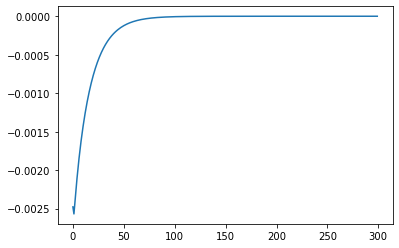

In [16]:
#Choloesky approach

shock_orth = np.array([1,0,0]) # A shock to the first series
irf = np.zeros(300)
chol_dec = np.linalg.cholesky(model_fit.resid_acov(0)[0])
shock = chol_dec @ shock_orth

for ii in range(300):
    n = (np.linalg.matrix_power(phis, ii)[0]@shock)
#     print(np.linalg.matrix_power(phis,ii)[0])
#     print('break\n')
#     print('standalone')
#     print(np.linalg.matrix_power(phis,ii))
#     print('ok done \n')
#     print(np.linalg.matrix_power(phis,ii)[1])
    irf[ii] = n[1]

plt.figure()
plt.plot(irf)

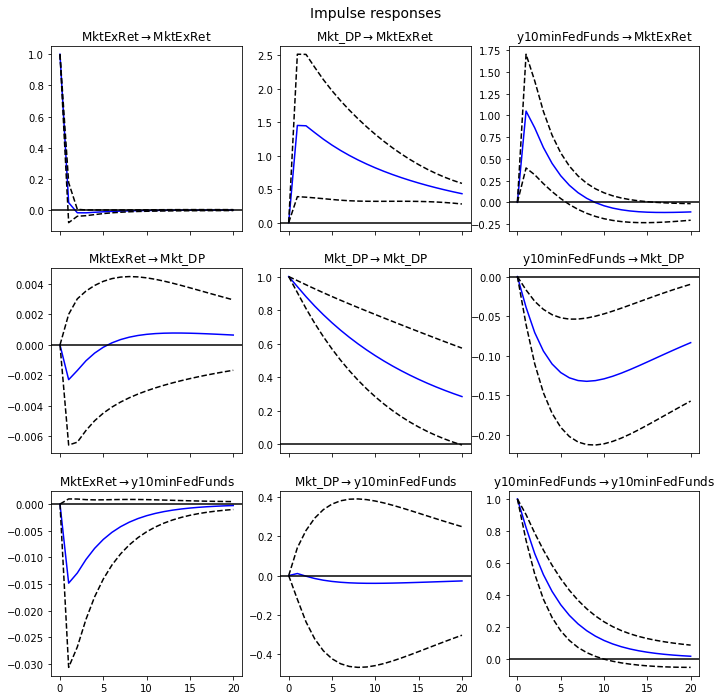

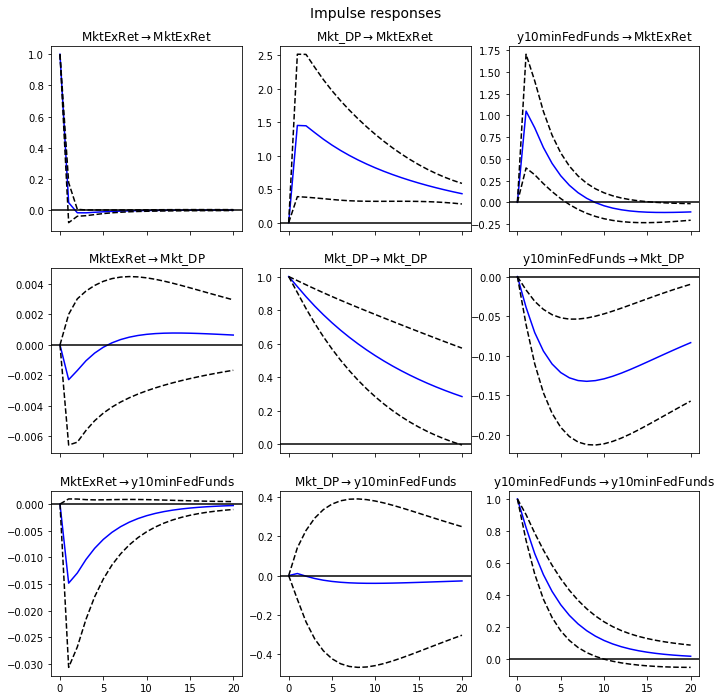

In [17]:
model_fit.irf(periods = 20).plot()

### 7. Using 80% of the data as a training sample, report results from an out-of-sample test for predicting excess market returns where you re-estimate the model at each time t and get the prediction error for the t+ 1 realizations.

In [18]:
# -----------Recurisve Forecasting-----------------------------

# ""Use the first 189 observations as training sample, then recursively re-estimate the model for every period."""


pred = np.zeros(47)
actual = np.zeros(47)

for ii in range(47):
    temp_data = df.iloc[0:189 + ii]
    model_fit = VAR(temp_data).fit()
    pred[ii] = model_fit.forecast(temp_data.values,1)[[0]] [0] [0]
    actual[ii]  = df.iloc[189 + ii].values[0]
    

rmse_var = sum(((pred-actual)**2)**0.5)/47


mse = np.mean((pred-actual)**2)    
denom = np.mean((actual - np.mean(actual))**2)
r2_outofsample  = 1-mse/denom

print(f"The predicted RMSE is: {rmse_var}.")
print("\n")
print(f"The predicted R^2 out of sample is: {r2_outofsample}.")

The predicted RMSE is: 0.061900451504671945.


The predicted R^2 out of sample is: -0.01545435230049308.


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignor